In [1]:
# Titanic Survival Prediction

In [2]:

#Importing important Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
#lets visualize the count of survivals with respect to passenger class

In [9]:
df['Survived'] = df['Survived'].astype(str)
df['Pclass'] = df['Pclass'].astype(str)

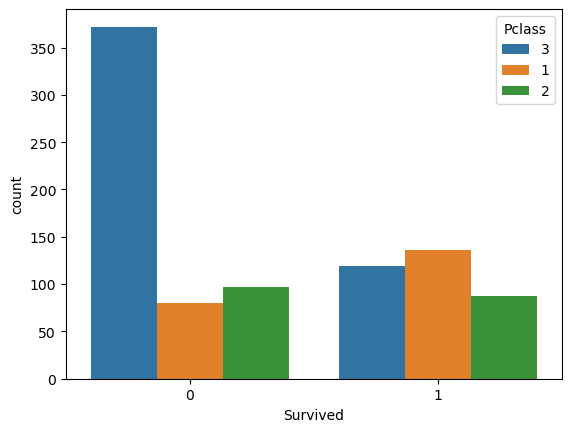

In [10]:
sns.countplot(data = df, x = df['Survived'], hue = df['Pclass'])
plt.show()

In [11]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

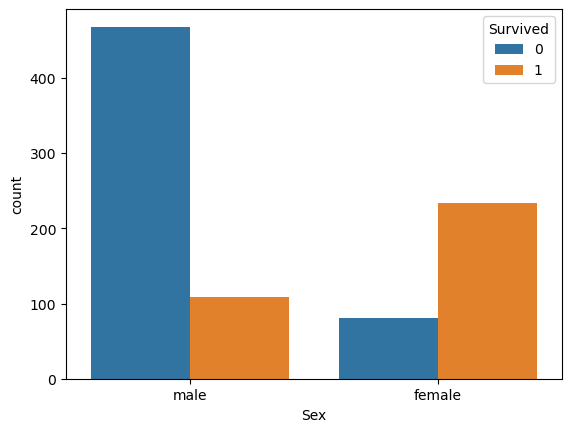

In [12]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

In [13]:
df.groupby('Sex')[['Survived']].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [14]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: object)

<Axes: xlabel='Sex', ylabel='count'>

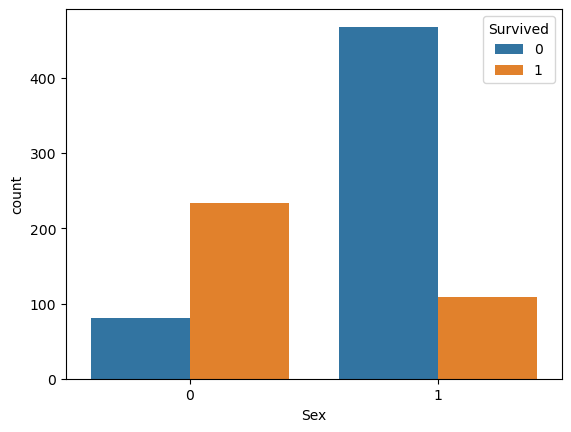

In [17]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

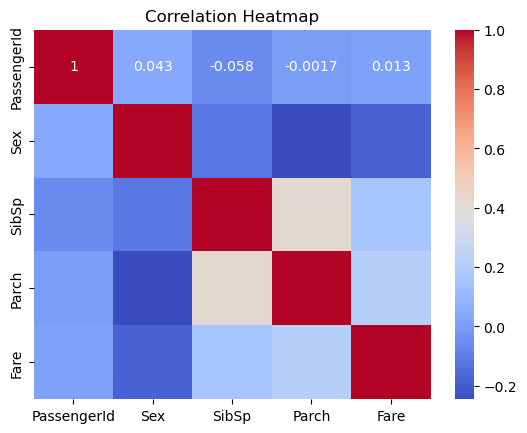

In [32]:


 # Dropping non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df = df.drop(['Age'], axis = 1)


In [20]:
df_final = df
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S


In [21]:
# Model Training

In [24]:
X = df[['Pclass', 'Sex']]
Y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [27]:
# Model Prediction

In [28]:
predict = print(log.predict(X_test))

['0' '0' '0' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0'
 '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '0']


In [29]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: object


In [31]:
import warnings
warnings.filterwarnings('ignore')

res = log.predict([[2,0]])

if (res == 0):
    print("NOT SURVIVED")

else:
    print("SURVIVED")
    

SURVIVED


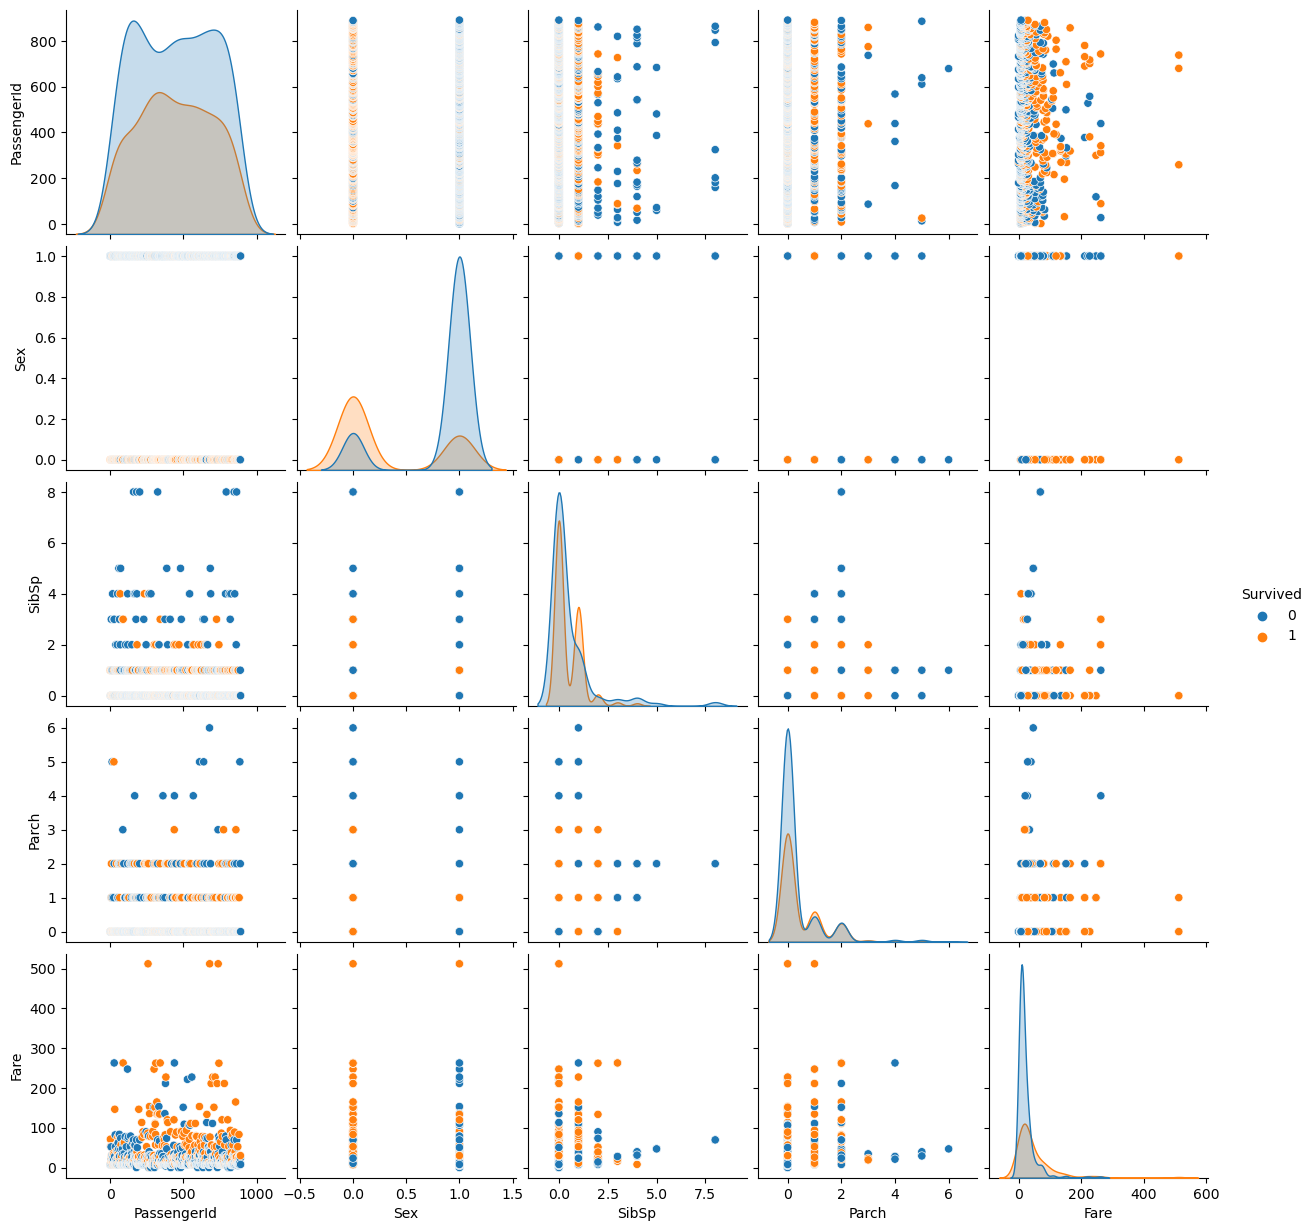

In [33]:
# Correlation Analysis
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()